In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno  as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif

In [34]:
portogrande = pd.read_csv('../data/portogrande.txt')

In [35]:
portogrande.columns

Index(['codigo', 'data', 'hora', 'temp_ins', 'temp_max', 'temp_min',
       'umid_inst', 'umid_max', 'umid_min', 'pto_orvalho_inst',
       'pto_orvalho_max', 'pto_orvalho_min', 'pressao', 'pressao_max',
       'pressao_min', 'vento_vel', 'vento_direcao', 'vento_rajada', 'radiacao',
       'precipitacao'],
      dtype='object')

In [36]:
portogrande.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7379 entries, 0 to 7378
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codigo            7379 non-null   object 
 1   data              7379 non-null   object 
 2   hora              7379 non-null   int64  
 3   temp_ins          7379 non-null   float64
 4   temp_max          7374 non-null   float64
 5   temp_min          7374 non-null   float64
 6   umid_inst         7379 non-null   int64  
 7   umid_max          7374 non-null   float64
 8   umid_min          7374 non-null   float64
 9   pto_orvalho_inst  7379 non-null   float64
 10  pto_orvalho_max   7374 non-null   float64
 11  pto_orvalho_min   7374 non-null   float64
 12  pressao           7379 non-null   float64
 13  pressao_max       7374 non-null   float64
 14  pressao_min       7374 non-null   float64
 15  vento_vel         7379 non-null   float64
 16  vento_direcao     7379 non-null   int64  


# Tratando dados Faltantes

In [37]:
# tabela percentual de dados faltantes
def tabela_faltantes():
    features_numericas = ["hora","temp_ins", "temp_max", "temp_min", "umid_inst","umid_max","umid_min",
                          "pto_orvalho_inst", "pto_orvalho_max", "pto_orvalho_min","pressao","pressao_max",
                          "pressao_min","vento_vel", "vento_direcao", "vento_rajada", "radiacao","precipitacao"]

    df = portogrande[features_numericas]


    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)


    missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Dados Ausentes', '% Percentual'])
    missing_data.index.name =' Variaveis numericas'
    return missing_data

In [38]:
tabela_faltantes()

,Dados Ausentes,% Percentual
Variaveis numericas,,
vento_rajada,6,0.000813
pto_orvalho_max,5,0.000678
umid_min,5,0.000678
temp_max,5,0.000678
pressao_min,5,0.000678
pressao_max,5,0.000678
temp_min,5,0.000678
pto_orvalho_min,5,0.000678
umid_max,5,0.000678


In [39]:
# Preenchendo as colunas com o valor da média:
mean_vra = portogrande.vento_rajada.mean()
mean_orv_min = portogrande.pto_orvalho_min.mean()
mean_orv_max = portogrande.pto_orvalho_max.mean()
mean_umid_min = portogrande.umid_min.mean()
mean_umid_max = portogrande.umid_max.mean()
mean_temp_min = portogrande.temp_min.mean()
mean_temp_max = portogrande.temp_max.mean()
mean_pressao_min = portogrande.pressao_min.mean()
mean_pressao_max = portogrande.pressao_max.mean()

portogrande['vento_rajada'] = portogrande['vento_rajada'].fillna(mean_vra)
portogrande['pto_orvalho_min'] = portogrande['pto_orvalho_min'].fillna(mean_orv_min)
portogrande['pto_orvalho_max'] = portogrande['pto_orvalho_max'].fillna(mean_orv_max)
portogrande['umid_min'] = portogrande['umid_min'].fillna(mean_umid_min)
portogrande['umid_max'] = portogrande['umid_max'].fillna(mean_umid_max)
portogrande['temp_min'] = portogrande['temp_min'].fillna(mean_temp_min)
portogrande['temp_max'] = portogrande['temp_max'].fillna(mean_temp_max)
portogrande['pressao_min'] = portogrande['pressao_min'].fillna(mean_pressao_min)
portogrande['pressao_max'] = portogrande['pressao_max'].fillna(mean_pressao_max)

In [40]:
tabela_faltantes() # vamos verificar os dados depois de tratarmos os dados ausentes

,Dados Ausentes,% Percentual
Variaveis numericas,,
precipitacao,0,0.0
radiacao,0,0.0
temp_ins,0,0.0
temp_max,0,0.0
temp_min,0,0.0
umid_inst,0,0.0
umid_max,0,0.0
umid_min,0,0.0
pto_orvalho_inst,0,0.0


- Matriz de nulidade

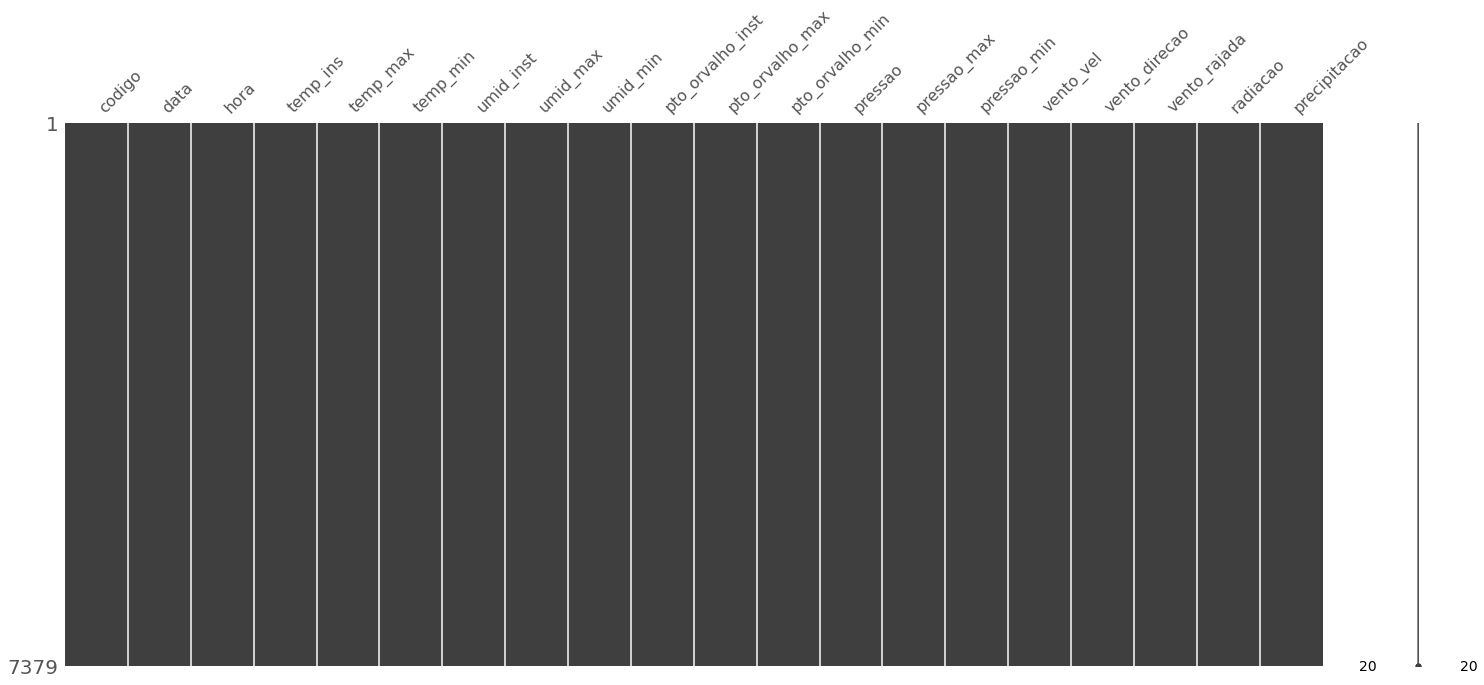

In [41]:
msno.matrix(portogrande)

OBS:. Apos te feito alguns testes de hipotese para normalidade (na verdade fiz na EDA só pra precipitação), heatcolor de correlação e toda analise percebeu-se que as features acima são as mais importantes  

## Seleção de Features 

- Selecionando o nosso X e Y  

In [42]:
y = portogrande['temp_ins'] # temperatura no instante
X = portogrande.drop(['temp_ins','codigo','data','hora'], axis=1) # removendo temperatura no instante e algumas features 

- Separando em Treino e Teste

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=0)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape 

((5165, 16), (2214, 16), (5165,), (2214,))

In [44]:
k_vs_score = []

for k in range(2,17,2): 
    selector = SelectKBest(score_func=f_regression, k=5)

    Xtrain2 = selector.fit_transform(Xtrain, ytrain)
    Xtest2 = selector.transform(Xtest)

    mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    mdl.fit(Xtrain2, ytrain)

    prev_temp = mdl.predict(Xtest2)

    score = mean_absolute_error(ytest, prev_temp)
    print(f'k = {k} - MAE = {score}')

    k_vs_score.append(score)

k = 2 - MAE = 0.18913046723046245
k = 4 - MAE = 0.1891304672304625
k = 6 - MAE = 0.18913046723046248
k = 8 - MAE = 0.18913046723046248
k = 10 - MAE = 0.18913046723046237
k = 12 - MAE = 0.18913046723046248
k = 14 - MAE = 0.18913046723046248
k = 16 - MAE = 0.18913046723046248


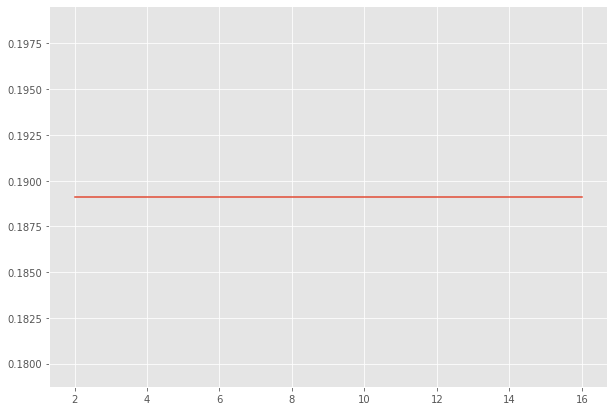

In [45]:
pd.Series(k_vs_score, index=range(2,17,2)).plot(figsize=(10,7)) # vamos printar um grafico de frequencia

In [46]:
selector = SelectKBest(score_func=f_regression, k=8) # selecionamos o intervalo
selector.fit(Xtrain, ytrain)

SelectKBest(k=8, score_func=<function f_regression at 0x7fc8c0024170>)

In [47]:
mask = selector.get_support()
Xtest.columns[mask] # vamos ver as features

Index(['temp_max', 'temp_min', 'umid_inst', 'umid_max', 'umid_min',
       'vento_vel', 'vento_rajada', 'radiacao'],
      dtype='object')

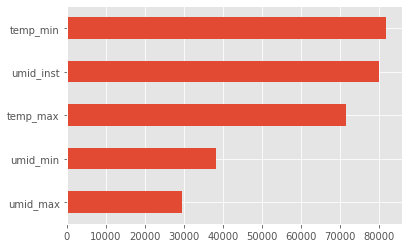

In [48]:
pd.Series(selector.scores_, index=Xtrain.columns).sort_values().tail().plot.barh()

## Avaliando o desempenho do modelo

In [49]:
print(f'𝑅² - Coeficiente de determinação: {r2_score(ytest, prev_temp).round(8)}') # 𝑅²
print(f'MSE - Erro médio quadrático: {mean_squared_error(ytest, prev_temp).round(8)}') # Mean Squared Error
print(f'MAE - Mediana dos erros de predição: {median_absolute_error(ytest, prev_temp).round(8)}') # Median Absolute Error'

𝑅² - Coeficiente de determinação: 0.99104164
MSE - Erro médio quadrático: 0.08626777
MAE - Mediana dos erros de predição: 0.11


## Salvando as Previsões

In [50]:
prev_temp_ptg = pd.Series(prev_temp)
prev_temp_ptg.to_csv('../output/prev_temp_ptg.csv',index = False)